#### Classification with k-Nearest Neighbor
How well can k-Nearest Neighbors predict the party of a given congressional voter based on their previous voting record? The Data are available for download via the [Machine Learning repository]( https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) at the University of California, Irvine. 

In [2]:
# Import the neccessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image

In [3]:
# Begin data cleaning.

# Create a column names variable since they cannot be inferred from the file of interest.
cols = ['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile','immigration','synfuels','education','superfund','crime','duty_free','eaa_rsa']

# Pass column_names explicitly to names parameter.
df = pd.read_csv('datasets/house-votes-84.data.txt', names=cols)

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
# Notably we have missing values encoded as '?', and our votes need to be transformed from 'y' or 'n' to 1 or 0.

# Convert '?' to NaN
df[df == '?'] = np.nan

# Let's check to see how many missing values we have in each column.
print(df.isnull().sum())

party            0
infants         12
water           48
budget          11
physician       11
salvador        15
religious       11
satellite       14
aid             15
missile         22
immigration      7
synfuels        21
education       31
superfund       25
crime           17
duty_free       28
eaa_rsa        104
dtype: int64


In [5]:
# Replace 'y' and 'n' with 1s and 0s.
df[df == 'y'] = 1
df[df == 'n'] = 0

# Print the head of df to check on the results
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [6]:
# Print shape of original DataFrame
print("The original DataFrame has shape: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("After dropping all rows with missing values the dataframe has shape: {}".format(df.shape))

The original DataFrame has shape: (435, 17)
After dropping all rows with missing values the dataframe has shape: (232, 17)


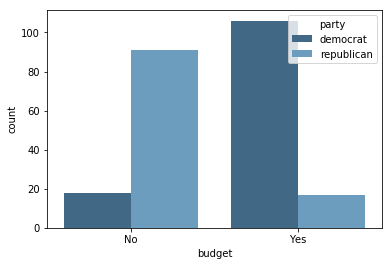

In [7]:
# It would appear the Democrats split mostly along party lines on this particular budget bill.
plt.figure()
sns.countplot(x='budget', hue='party', data=df, palette='Blues_d')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [8]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create training and test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [9]:
# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Print the models accuracy
print("kNN score: {}%".format(knn.score(X_test, y_test) * 100))

kNN score: 93.1034482759%


In [10]:
# print the model predictions
print(y_pred)

['democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'democrat' 'republican' 'republican' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'republican' 'republican' 'republican' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat']


##### Good is not great, so why not try slightly differnt method to if it yields better results
The model's accuracy against unseen data is 93.1% that's pretty good. That said, I dropped a number of rows that contained missing values, so I'll take a slight detour to see if there's a better result if I input the mean of votes' in place of the missing data

In [23]:
# Pass column_names explicitly to names parameter.
df_mean = pd.read_csv('datasets/house-votes-84.data.txt', names=cols)

# Like earlier, I'll replace 'y' and 'n' with 1s and 0s
df_mean.replace(to_replace='y', value=1, inplace=True)
df_mean.replace(to_replace='n', value=0, inplace=True)

# However this time I replace NANs with the votes' mean
df_mean.replace(to_replace='?', value=np.nan, inplace = True)
df_mean.fillna(df_mean.mean(), inplace=True)

# I'll repeat the same steps as before for splitting, fitting and predicting using k-NN
y = df_mean['party'].values
X = df_mean.drop('party', axis=1).values

# Create training and test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Print the models accuracy
print("kNN score: {}%".format(knn.score(X_test, y_test) * 100))

kNN score: 95.4128440367%


##### Mean of votes'
It looks like going with the mean of votes rather than dropping missing values increased the performance of the k-NN model to 95.4%. But is that always the case with different models? Previously, we replaced missing values with the mean and we dropped them in separate steps, but this can be achieved using a data pipeline as well. I'll demonstrate that below.

In [26]:
# Import the necessary modules
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Setup the Imputation transformer and take the mean of a given feature/column in place of any missing values.
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Instantiate the SVC classifier
clf = SVC()

# Setup the pipeline with the required steps
steps = [('imputation', imp), ('SVM', clf)]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
df_imp = pd.read_csv('datasets/house-votes-84.data.txt', names=cols)
df_imp.replace(to_replace='y', value=1, inplace=True)
df_imp.replace(to_replace='n', value=0, inplace=True)
df_imp.replace(to_replace='?', value=np.nan, inplace = True)

y = df_imp['party'].values
X = df_imp.drop('party', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

   democrat       0.98      0.96      0.97        85
 republican       0.94      0.96      0.95        46

avg / total       0.96      0.96      0.96       131



In [27]:
# Setup the pipeline steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)), ('SVM', SVC())]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

   democrat       0.99      0.96      0.98        85
 republican       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131



#### Classification Report
Precision is the fraction of predicted positives observations that are actually positive; it's given by `true positives / (true positive + false positives)`. The Support Vector Machine model is 98% precise when predicting democrats and 94% precise in predicting republicans. Recall, the fraction of positives observations that were predicted correctly, is given by `true postives / (true positives + false negatives)`, and the SVM model recalls 96% predicted democrats and 96% predicted republicans. f1-score is a weighted average of precision and recall while support gives the number of samples of the true response that lie in that class.

However, replacing missing values with the mean yields slightly worse results than replacing missing values with the 'most frequent' value in the column as seen in the last cell. When missing values are replaced using 'most frequent' the Support Vector Machine model is 99% precise when predicting democrats and 94% precise in predicting republicans. While, this model recalls 96% predicted democrats and 98% predicted republicans.

As show, both of the models are excellent at predicting the part of congressional members solely based on the 

<img src="assets/Precisionrecall.svg.png" width="25%" align="left"/>